# 项目：可视化帕默群岛企鹅数据

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本的相关变量进行可视化，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度，之间的关系。

## 简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv('penguins.csv')
original_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
cleaned_data = original_data.copy()

首先查看整齐度

In [4]:
cleaned_data.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
146,Adelie,Dream,39.2,18.6,190.0,4250.0,MALE
85,Adelie,Dream,41.3,20.3,194.0,3550.0,MALE
318,Gentoo,Biscoe,48.4,14.4,203.0,4625.0,FEMALE
255,Gentoo,Biscoe,48.4,16.3,220.0,5400.0,MALE
273,Gentoo,Biscoe,50.1,15.0,225.0,5000.0,MALE
250,Gentoo,Biscoe,47.3,15.3,222.0,5250.0,MALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
317,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,FEMALE
132,Adelie,Dream,36.8,18.5,193.0,3500.0,FEMALE


可见数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

干净度

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


可见列`culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`, `sex`都存在缺失值，将在清洗阶段进行分析

而`species`（企鹅种类）`sex`（企鹅性别）、`island`（企鹅所在岛）都是分类数据，因此可以把数据类型都转换为Category。

In [6]:
cleaned_data['species'] = cleaned_data['species'].astype('category')
cleaned_data['sex'] = cleaned_data['sex'].astype('category')
cleaned_data['island'] = cleaned_data['island'].astype('category')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


接下来查看缺失值

In [7]:
cleaned_data.query('culmen_length_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


发现这两个缺失的数据包括了以上评估出来的五个数据列都为缺失，对后续分许作用不大，因此将其全部删除。

In [8]:
cleaned_data.drop([3,339],inplace = True)

In [9]:
cleaned_data.query('culmen_length_mm.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [10]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


sex还存在缺失值

In [11]:
cleaned_data.query('sex.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


缺失性别变量的观察值具备其它数据，仍然可以为分析提供价值。由于Pandas以及Matplotlib、Seaborn会自动忽略缺失值，可以保留这些行。

对于变量重复，此次分析是允许存在变量重复的，因此不需要对重复数据进行分析。

对于不一样的变量，可能存在于`species`,`island`,`sex`中，对其进行查看

In [12]:
cleaned_data['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

种类为三种企鹅类型，变量没问题

In [13]:
cleaned_data['island'].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

三个群岛也没问题

In [14]:
cleaned_data['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

性别只有两种，但是多出了一个为`.`的性别，应该对其改成空值

In [15]:
cleaned_data['sex'] = cleaned_data['sex'].replace('.',np.nan)

In [16]:
cleaned_data['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

无效或错误数据处理

In [17]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


从以上统计信息来看，cleaned_data里不存在脱离现实意义的数值。

## 探索数据

我们将通过数据可视化，进行探索和分析，从图表中获得企鹅样本数据的相关洞察。

先定义一下色盘

In [31]:
sns.set_palette('Paired')

In [32]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


先查看每种企鹅数量的可视化，可以使用饼图直观查看

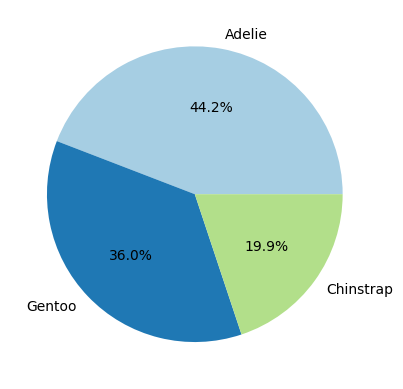

In [33]:
species_count = cleaned_data['species'].value_counts()
plt.pie(species_count, autopct = '%.1f%%', labels = species_count.index)
plt.show()

样本中`Adelie`这个种类的企鹅占比最大，`Gentoo`种类的占比次之，`Chinstrap`的占比最小，为1/5左右。

接下来看岛屿的企鹅数量和性别数量

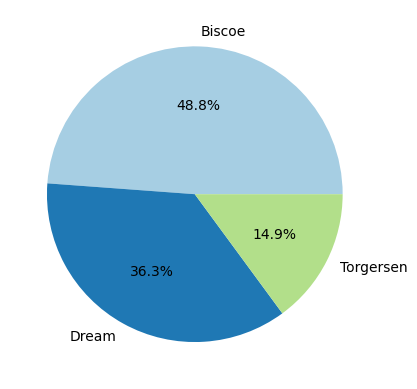

In [34]:
islands_count = cleaned_data['island'].value_counts()
plt.pie(islands_count, autopct = '%.1f%%', labels = islands_count.index)
plt.show()

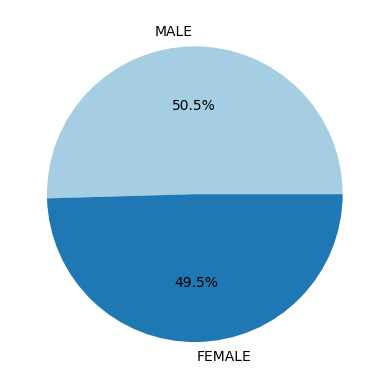

In [35]:
sex_count = cleaned_data['sex'].value_counts()
plt.pie(sex_count, autopct = '%.1f%%', labels = sex_count.index)
plt.show()

样本中一半左右的企鹅样本都来自`Biscoe`岛屿，占比最大，其次是`Dream`岛屿，来自`Torgersen`岛屿的样本最少。

样本企鹅的性别占比持平，符合随机抽样。

### 接下来探索不同岛屿上企鹅数量和性别数量

数量可以用计数图来查看

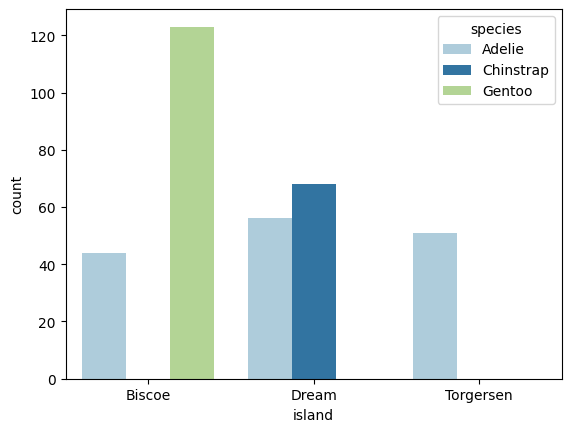

In [36]:
sns.countplot(cleaned_data,x = 'island' ,hue = 'species')
plt.show()

从以上可以看出，`Adelie`种类的企鹅样本在`Biscoe`、`Dream`、`Torgersen`这三个岛上都有，而`Chinstrap`种类只在`Dream`岛上才有，`Gentoo`只在`Biscoe`岛上才有。

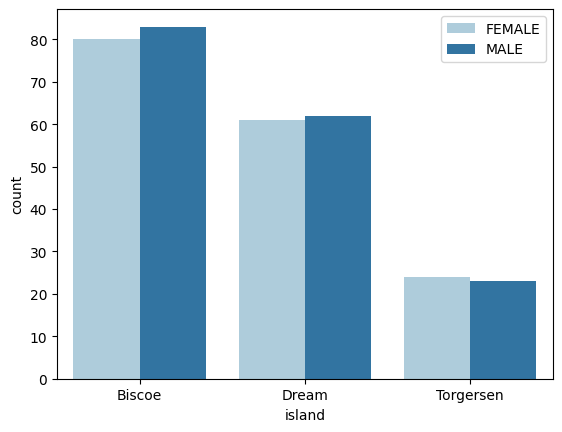

In [37]:
sns.countplot(cleaned_data, x = 'island', hue = 'sex')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

可见三个岛屿上的企鹅性别基本持平

### 查看数值之间的相关关系

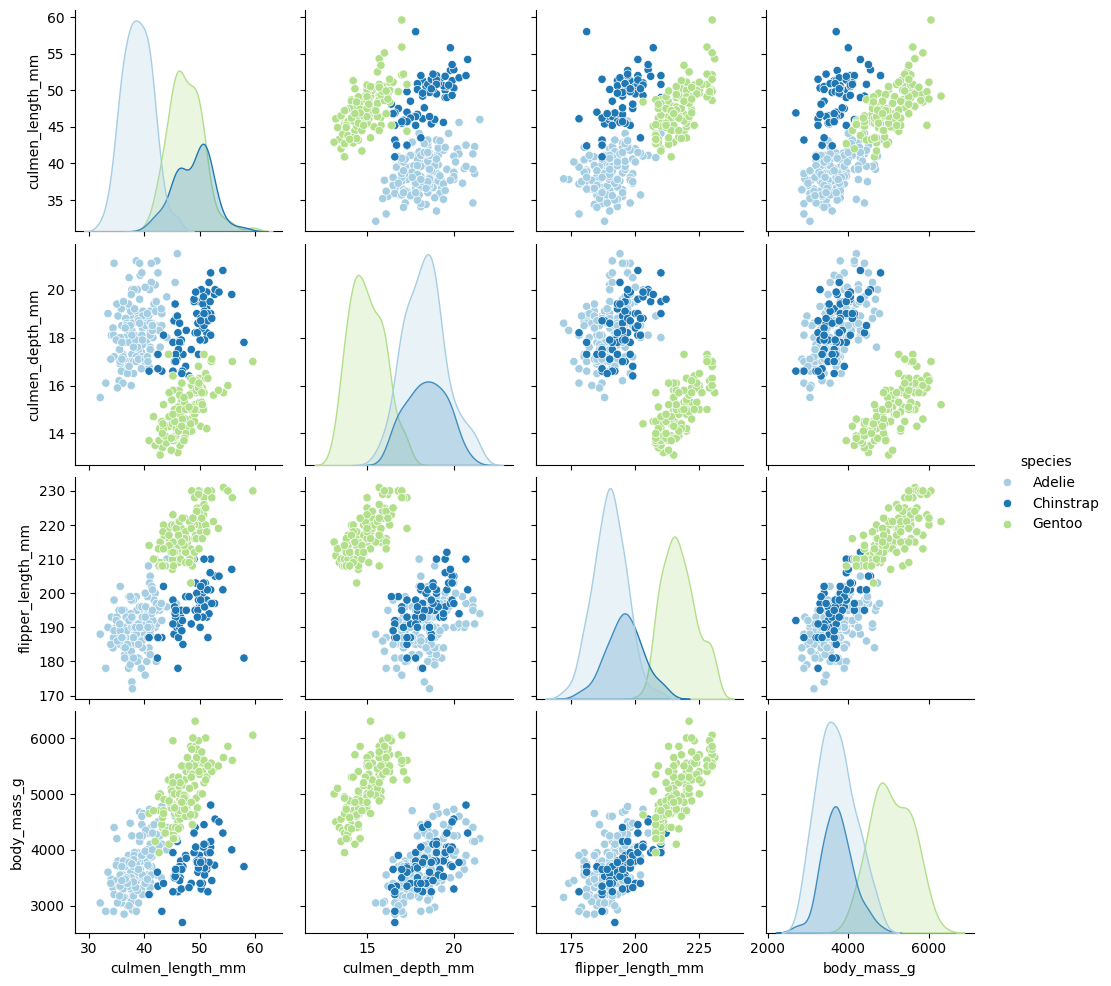

In [38]:
sns.pairplot(cleaned_data,hue = 'species')
plt.show()

同一种类的企鹅样本数据，在散点图上基本都聚在一起，说明同一种类的企鹅在嘴峰长度、嘴峰深度、鳍长度、体重之间关系上，存在相似性。这些发现有利于我们根据体重、鳍长等数值推测企鹅种类，也可以根据企鹅种类推测体重、鳍长等数值。

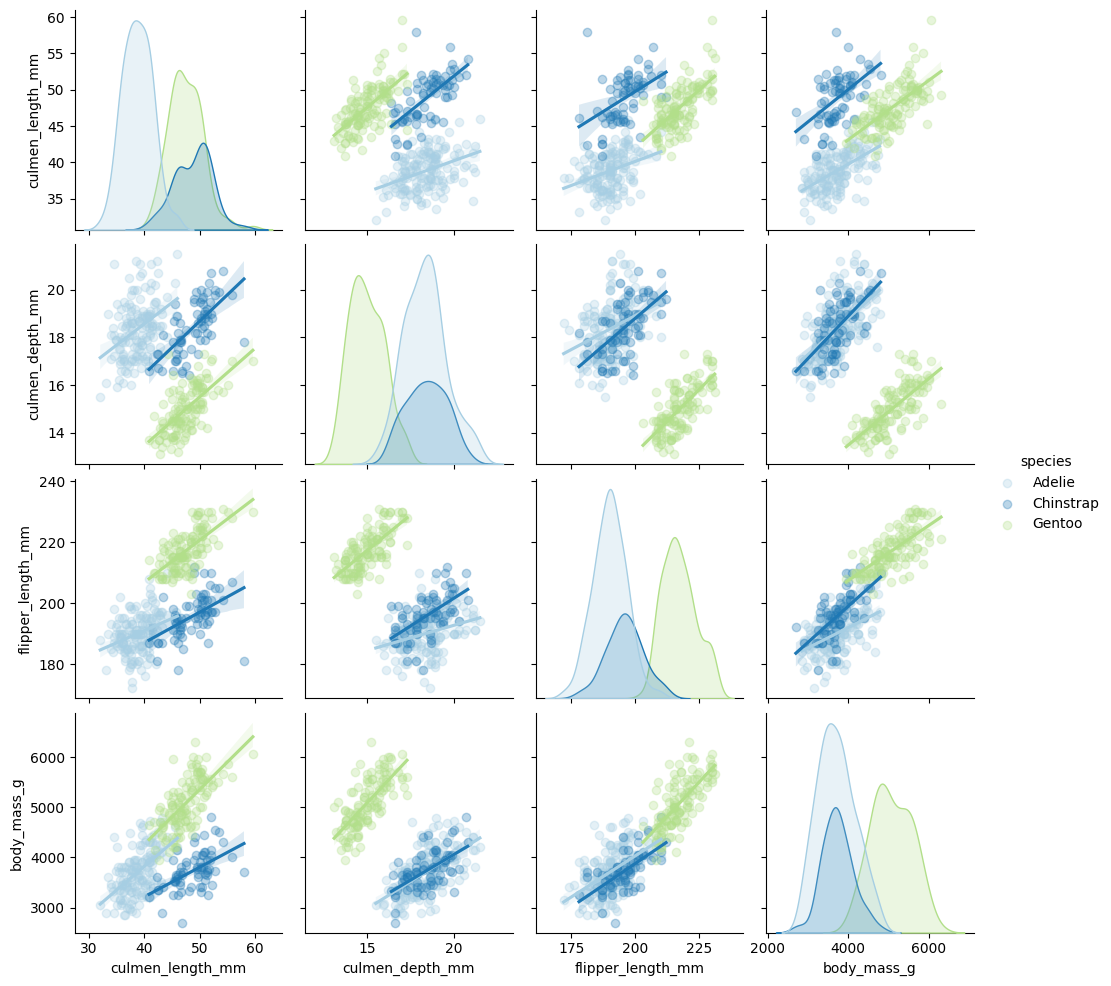

In [40]:
sns.pairplot(cleaned_data, hue = 'species', kind = 'reg', plot_kws ={'scatter_kws': {'alpha': 0.3}})
plt.show()

散点图结合线性回归线来看，同类企鹅的属性数据之间均呈线性正比，即嘴峰越长，嘴峰越深，鳍越长，体重越重，嘴峰越短，嘴峰越浅，鳍越短，体重越轻。

从密度图的分布来看，可以得到以下关于样本的发现：
- Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短。
- Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短。
- Adelie的鳍长度最短，Chinstrap中等，而Gentoo的鳍长度嘴长。
- Adelie和Chinstrap的体重范围较为接近，而Gentoo的体重更大。

但不同种类的属性数值否存在统计显著性差异，仍然需要进行假设检验后才能得到结论。

### 根据性别查看数值之间的相关关系

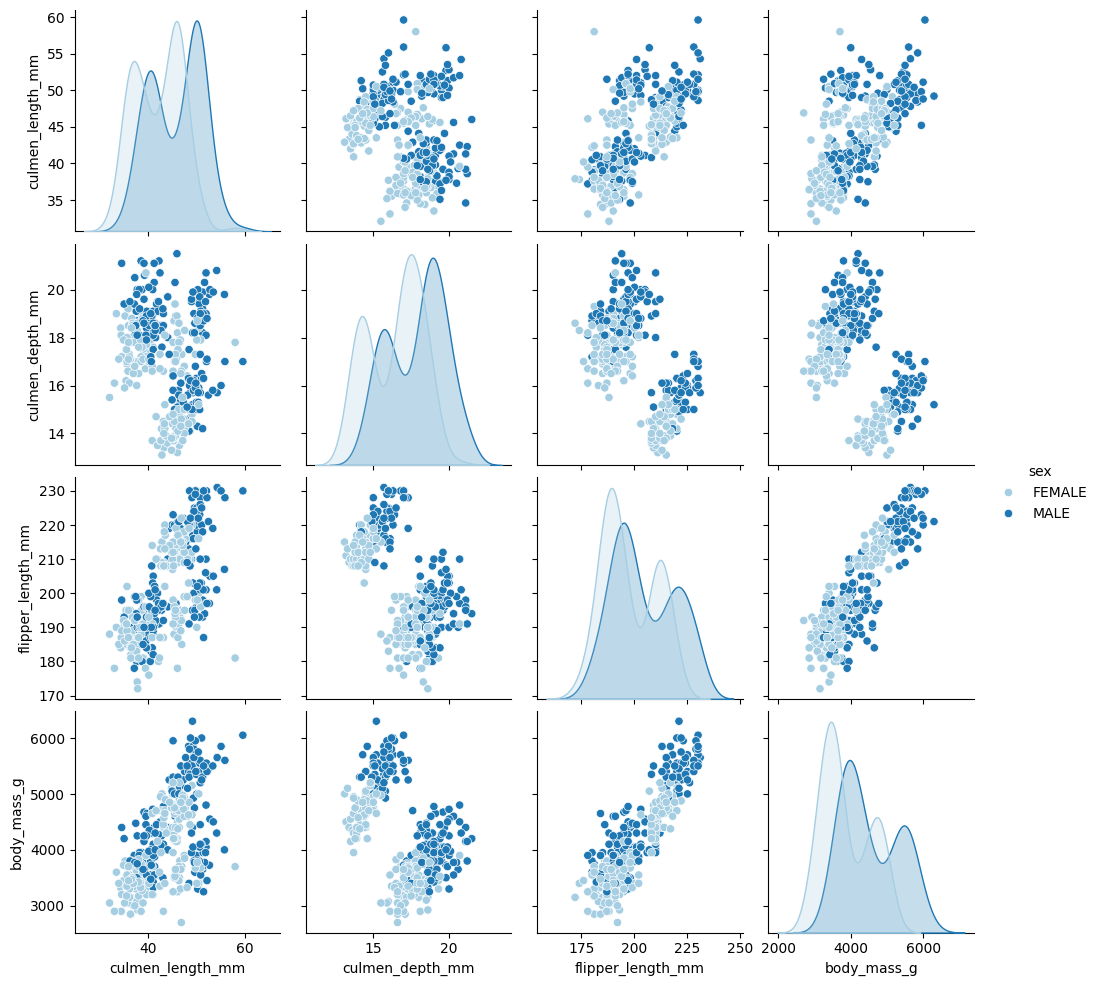

In [44]:
sns.pairplot(cleaned_data,hue = 'sex')

plt.show()

根据性别划分后可以看出，样本中雄性企鹅在各项属性数值方面大于雌性企鹅。